### Veri seti yüklenerek Türkçe karakter sorunları giderilmiştir.

In [1]:
import pandas as pd

In [2]:
file = "proje_veri_kumesi.csv"
df = pd.read_csv(file,encoding="latin-1")

In [3]:
#df
df.columns = ["id","yas","cisniyet","agri","yeme_bozuklugu","bulanti","agri_2","ates","ates_1","sicrama","lokosit_ornegi",
              "kayma","skor","lokositoz","notrofil","lenfosit","n/l","crp","plasma","procalcitonin","teshis"]

# 1) VERİ SETİNİ TANIMA
# 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              850 non-null    int64  
 1   yas             850 non-null    int64  
 2   cisniyet        850 non-null    object 
 3   agri            849 non-null    object 
 4   yeme_bozuklugu  850 non-null    object 
 5   bulanti         849 non-null    object 
 6   agri_2          850 non-null    object 
 7   ates            850 non-null    object 
 8   ates_1          850 non-null    object 
 9   sicrama         850 non-null    object 
 10  lokosit_ornegi  850 non-null    object 
 11  kayma           850 non-null    object 
 12  skor            850 non-null    int64  
 13  lokositoz       850 non-null    object 
 14  notrofil        850 non-null    float64
 15  lenfosit        850 non-null    float64
 16  n/l             849 non-null    float64
 17  crp             613 non-null    obj

## Tespit Edilen Problemler:
### - “ates_1” değerleri ondalık sayı tipinde olması gerekirken “object” tipindedir.
### - “lokositoz” değerleri ondalık sayı tipinde olması gerekirken “object” tipindedir.
### - “crp” değerleri ondalık sayı tipinde olması gerekirken “object” tipindedir.
### - “ateş” değerleri, “ateş(1)” değerlerinden türetilebileceğinden “ateş” değerlerine gerek yoktur.
### - “ateş” ve “ateş(1)” verileri arasından tutarsızlık mevcuttur.
### - agri, bulanti, n/l, crp, plasma, procalcitonin ve teshis sütunlarında eksik veriler mevcuttur.
### 

# 2) VERİ ÖZETLEME
# 

### ates ve plasma sütunları silinmiştir.

In [5]:
df = df.drop(['ates','plasma'],axis=1)

### ates_1, lokositoz, crp sütunlarının hataları giderilerek ondalık sayı tipine dönüştürülmüştür

In [6]:
columns = ['ates_1','lokositoz','crp']

for column in columns:
    df[column] = df[column].str.replace(' ','')
    df[column] = pd.to_numeric(df[column],errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              850 non-null    int64  
 1   yas             850 non-null    int64  
 2   cisniyet        850 non-null    object 
 3   agri            849 non-null    object 
 4   yeme_bozuklugu  850 non-null    object 
 5   bulanti         849 non-null    object 
 6   agri_2          850 non-null    object 
 7   ates_1          850 non-null    float64
 8   sicrama         850 non-null    object 
 9   lokosit_ornegi  850 non-null    object 
 10  kayma           850 non-null    object 
 11  skor            850 non-null    int64  
 12  lokositoz       845 non-null    float64
 13  notrofil        850 non-null    float64
 14  lenfosit        850 non-null    float64
 15  n/l             849 non-null    float64
 16  crp             612 non-null    float64
 17  procalcitonin   549 non-null    flo

### Veri özetlenmiştir ve tablo halinde gösterilmiştir.

In [8]:
summary_table = df.describe().drop('count',axis=0).drop('id',axis=1)

mod = {}

columns = summary_table.columns

for column in columns:
    
    mods = df[column].mode()
    mod_value = ""
    
    for i in range(0,len(mods)):
        mod_value += str(mods.iloc[i]) + ", "
    
    mod.update({column:mod_value[:-2]})

mod = pd.DataFrame(pd.Series(mod))
iqr = pd.DataFrame(summary_table.loc['75%'] - summary_table.loc['25%'])

summary_table = pd.concat([summary_table,mod.T,iqr.T])
summary_table.index = ['ortalama','standart_sapma','minimum','1.ceyrek','ortanca',
                       '3.ceyrek','maksimum','mod','ceyrekler_acikligi (iqr)']

summary_table

,yas,ates_1,skor,lokositoz,notrofil,lenfosit,n/l,crp,procalcitonin
ortalama,10.394118,36.512659,4.347059,13.383598,68.617271,23.371035,5.315783,2.761013,2.015282
standart_sapma,3.825242,0.595045,1.962132,53.564047,26.270339,13.758352,5.758817,7.078963,20.651098
minimum,4.0,35.9,0.0,3.3,2.65,1.03,0.0,0.0,0.02
1.ceyrek,7.0,36.2,3.0,8.16,55.6,11.5,1.65,0.17,0.21
ortanca,10.0,36.48,4.0,10.5,69.4,21.35,3.23,0.5,0.28
3.ceyrek,14.0,36.58,6.0,14.1,81.275,33.475,6.76,2.3,0.34
maksimum,18.0,45.0,9.0,1560.0,681.0,82.9,47.2,91.0,288.0
mod,"6, 7",36.48,5,"7.2, 9.2","63.3, 80.2",16.3,1.54,0.2,0.29
ceyrekler_acikligi (iqr),7.0,0.38,3.0,5.94,25.675,21.975,5.11,2.13,0.13


# 3) HATALARIN GİDERİLMESİ

## 3.A. Aykırı Değer Probleminin Çözülmesi

### Aykırı değerler grafik ile gösterilmiştir.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\yusuf\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


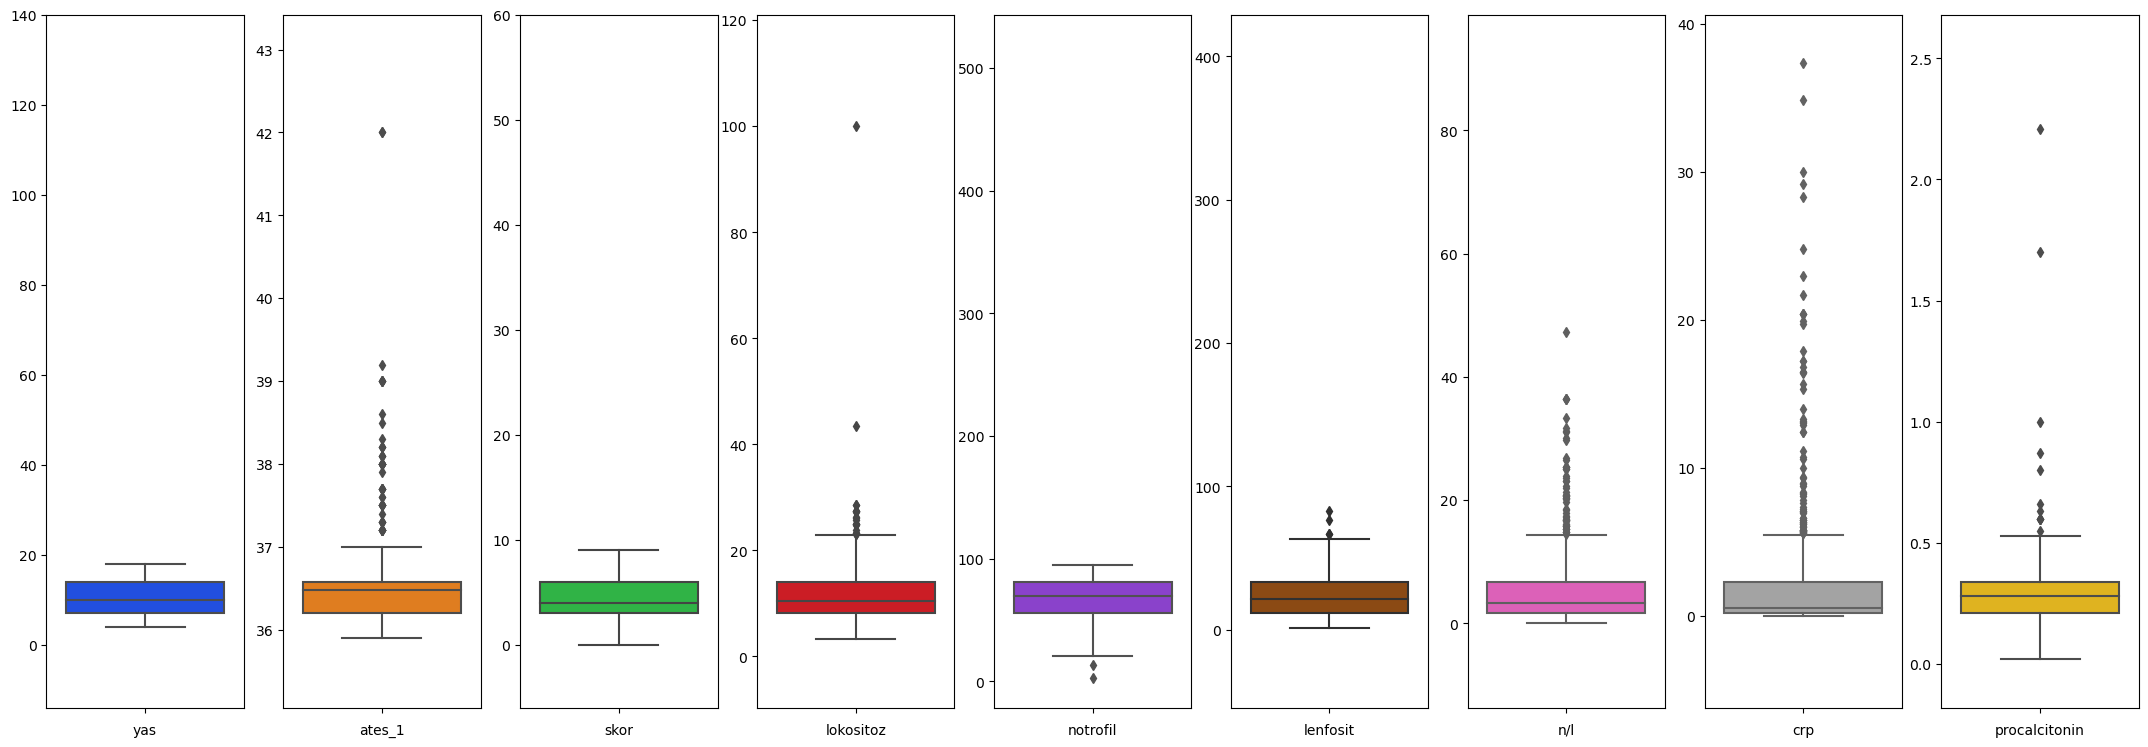

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(27,9))

columns = summary_table.columns
ln = len(columns)
i=1

colors = sns.color_palette("bright", 9)

for column in columns:
    plt.subplot(1,ln,i)
    sns.boxplot(data=df,y=column,palette=[colors[i-1]])
    
    x1 = summary_table[column].loc['1.ceyrek'] - 3 * summary_table[column].loc['ceyrekler_acikligi (iqr)']
    x2 = summary_table[column].loc['3.ceyrek'] + 18 * summary_table[column].loc['ceyrekler_acikligi (iqr)']
    
    plt.ylim(x1,x2)
    plt.ylabel("")
    plt.xlabel(column)
    
    i+=1

plt.show()
plt.savefig('proje_grafik.png')

### Aykırı değerler tespit edilerek boş değerlerle doldurulmuştur.

In [11]:
without_outliers = df.copy()

In [12]:
from math import ceil,floor
for column in summary_table.columns:
    
    value = summary_table[column].loc['ceyrekler_acikligi (iqr)'] * 1.5
    
    lower = summary_table[column].loc['1.ceyrek'] - value
    upper = summary_table[column].loc['3.ceyrek'] + value
    
    filtre = ((df[column] >= upper) | (df[column] <= lower))
    
    without_outliers.loc[filtre, column] = None
    
    #print(column,round(lower,2),round(upper,2))

yas -3.5 24.5
ates_1 35.63 37.15
skor -1.5 10.5
lokositoz -0.75 23.01
notrofil 17.09 119.79
lenfosit -21.46 66.44
n/l -6.01 14.42
crp -3.02 5.49
procalcitonin 0.01 0.54


In [13]:
without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              850 non-null    int64  
 1   yas             850 non-null    float64
 2   cisniyet        850 non-null    object 
 3   agri            849 non-null    object 
 4   yeme_bozuklugu  850 non-null    object 
 5   bulanti         849 non-null    object 
 6   agri_2          850 non-null    object 
 7   ates_1          796 non-null    float64
 8   sicrama         850 non-null    object 
 9   lokosit_ornegi  850 non-null    object 
 10  kayma           850 non-null    object 
 11  skor            850 non-null    float64
 12  lokositoz       824 non-null    float64
 13  notrofil        847 non-null    float64
 14  lenfosit        846 non-null    float64
 15  n/l             795 non-null    float64
 16  crp             533 non-null    float64
 17  procalcitonin   525 non-null    flo

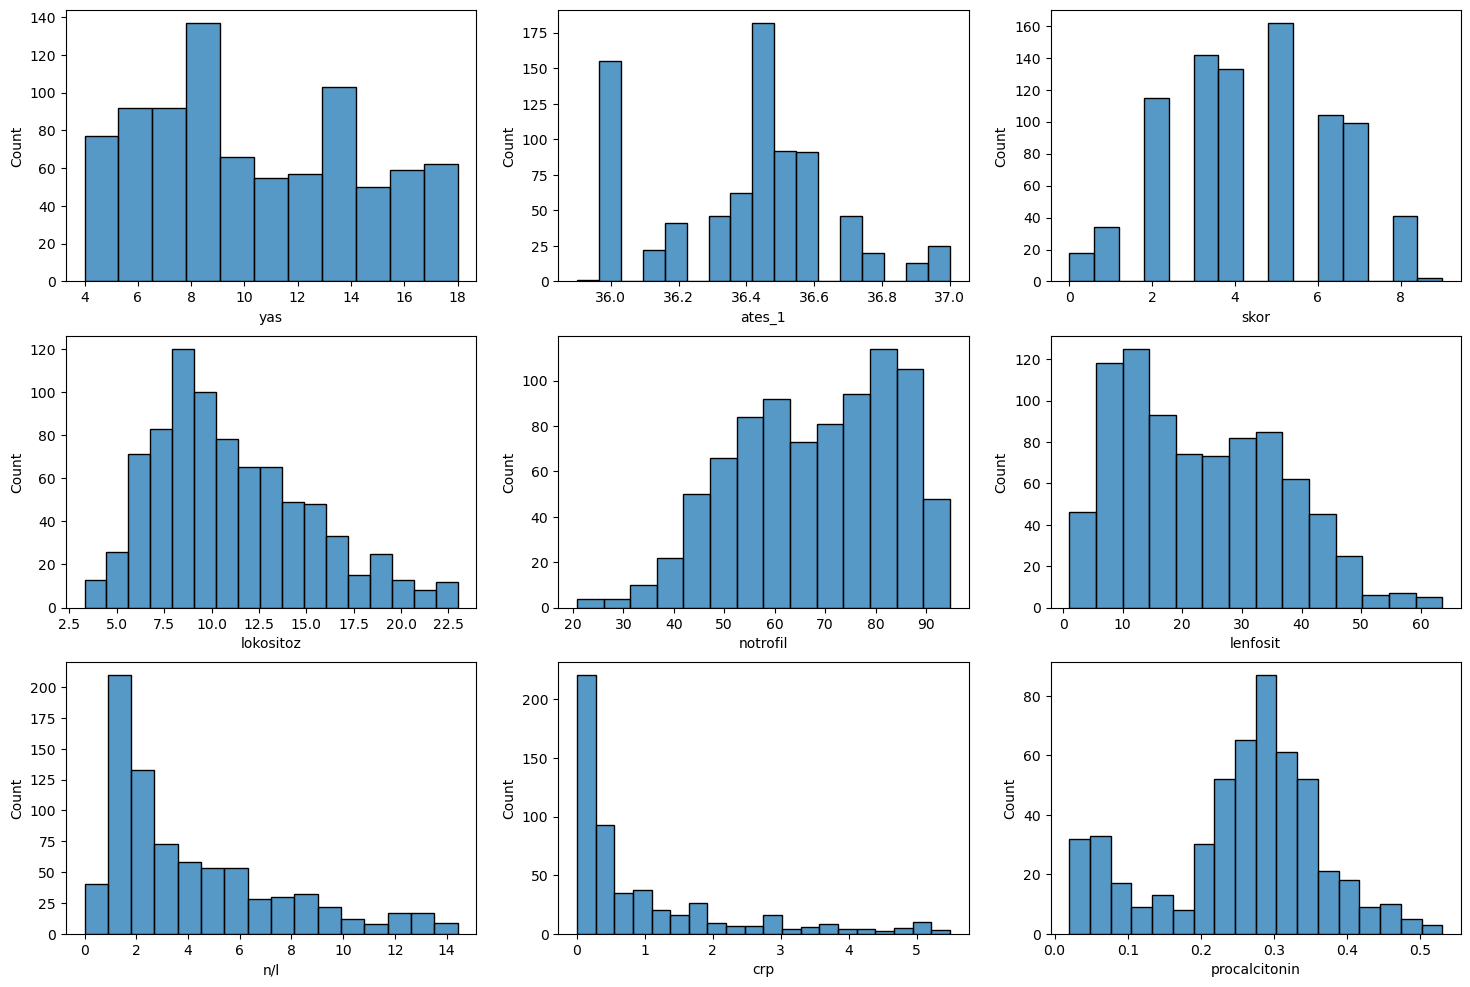

## 3.B. Eksik Verilerin Giderilmesi

### Teşhis sütunundaki eksik veriler silindi

In [15]:
clean_data = without_outliers.copy()
clean_data.dropna(subset=['teshis'],inplace=True)
clean_data.reset_index(drop=True,inplace=True)

In [16]:
clean_data.info()
#clean_data.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              843 non-null    int64  
 1   yas             843 non-null    float64
 2   cisniyet        843 non-null    object 
 3   agri            842 non-null    object 
 4   yeme_bozuklugu  843 non-null    object 
 5   bulanti         842 non-null    object 
 6   agri_2          843 non-null    object 
 7   ates_1          789 non-null    float64
 8   sicrama         843 non-null    object 
 9   lokosit_ornegi  843 non-null    object 
 10  kayma           843 non-null    object 
 11  skor            843 non-null    float64
 12  lokositoz       817 non-null    float64
 13  notrofil        840 non-null    float64
 14  lenfosit        839 non-null    float64
 15  n/l             788 non-null    float64
 16  crp             528 non-null    float64
 17  procalcitonin   518 non-null    flo

### Ateş(1), Nötrofil, Lenfosit, Lökositoz, N/L, CRP ve Procalcitonin sütunlarındaki boş değerler, sahip oldukları sınıf değerlerine göre ortalamaları alınarak dolduruldu.

In [17]:
clean_data['teshis'].unique()

array(['Negatif', 'Pozitif'], dtype=object)

In [18]:
columns = ['ates_1','notrofil','lenfosit','lokositoz','n/l','crp','procalcitonin']

for column in columns:
    means = clean_data.groupby('teshis')[column].transform('mean')
    clean_data[column].fillna(means,inplace=True)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              843 non-null    int64  
 1   yas             843 non-null    float64
 2   cisniyet        843 non-null    object 
 3   agri            842 non-null    object 
 4   yeme_bozuklugu  843 non-null    object 
 5   bulanti         842 non-null    object 
 6   agri_2          843 non-null    object 
 7   ates_1          843 non-null    float64
 8   sicrama         843 non-null    object 
 9   lokosit_ornegi  843 non-null    object 
 10  kayma           843 non-null    object 
 11  skor            843 non-null    float64
 12  lokositoz       843 non-null    float64
 13  notrofil        843 non-null    float64
 14  lenfosit        843 non-null    float64
 15  n/l             843 non-null    float64
 16  crp             843 non-null    float64
 17  procalcitonin   843 non-null    flo

### Ağrı ve Bulantı sütunları sınıf değerlerine göre en çok tekrar eden verilerle doldurulmuştur.

In [19]:
columns = ['agri','bulanti']

for column in columns:
    for teshis in clean_data['teshis'].unique():
        filtre = clean_data['teshis'] == teshis
        mod = clean_data[filtre]['agri'].mode().iloc[0]
        clean_data.loc[filtre,column] = clean_data.loc[filtre,column].fillna(mod)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              843 non-null    int64  
 1   yas             843 non-null    float64
 2   cisniyet        843 non-null    object 
 3   agri            843 non-null    object 
 4   yeme_bozuklugu  843 non-null    object 
 5   bulanti         843 non-null    object 
 6   agri_2          843 non-null    object 
 7   ates_1          843 non-null    float64
 8   sicrama         843 non-null    object 
 9   lokosit_ornegi  843 non-null    object 
 10  kayma           843 non-null    object 
 11  skor            843 non-null    float64
 12  lokositoz       843 non-null    float64
 13  notrofil        843 non-null    float64
 14  lenfosit        843 non-null    float64
 15  n/l             843 non-null    float64
 16  crp             843 non-null    float64
 17  procalcitonin   843 non-null    flo

In [20]:
clean_data.head(20)

,id,yas,cisniyet,agri,yeme_bozuklugu,bulanti,agri_2,ates_1,sicrama,lokosit_ornegi,kayma,skor,lokositoz,notrofil,lenfosit,n/l,crp,procalcitonin,teshis
0,1,7.0,E,var,yok,yok,var,36.500000,yok,var,var,6.0,12.1,76.6,15.0,5.110000,4.800000,0.252848,Negatif
1,2,7.0,E,var,yok,yok,var,36.600000,yok,var,yok,5.0,16.6,55.6,31.6,1.760000,0.010000,0.252848,Negatif
2,3,13.0,K,var,var,var,yok,36.600000,yok,yok,yok,3.0,9.6,68.0,16.0,4.250000,0.200000,0.252848,Negatif
3,4,6.0,E,var,yok,yok,var,36.700000,yok,var,yok,3.0,10.8,39.5,44.4,0.890000,0.400000,0.252848,Negatif
4,5,14.0,E,var,var,var,var,36.600000,yok,yok,yok,5.0,4.9,62.3,18.2,3.420000,0.852725,0.252848,Negatif
5,6,7.0,E,var,yok,yok,var,36.500000,yok,var,yok,5.0,16.8,38.7,47.5,0.810000,0.852725,0.252848,Negatif
6,7,6.0,E,var,var,var,var,36.400000,yok,var,var,8.0,20.2,81.4,10.3,7.900000,0.852725,0.150000,Negatif
7,8,7.0,E,var,yok,yok,var,36.800000,yok,var,yok,3.0,11.3,65.8,21.2,3.100000,3.400000,0.080000,Negatif
8,9,17.0,E,var,var,var,var,36.400000,yok,yok,yok,5.0,7.3,65.4,25.1,2.610000,0.852725,0.252848,Negatif
9,10,12.0,K,var,var,var,var,36.800000,yok,var,var,8.0,14.4,91.8,4.3,3.916865,0.852725,0.300000,Negatif
